# Homework 3

### Load and normalize CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(
            (0.5, 0.5, 0.5),
            (0.5, 0.5, 0.5)
        )
    ]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


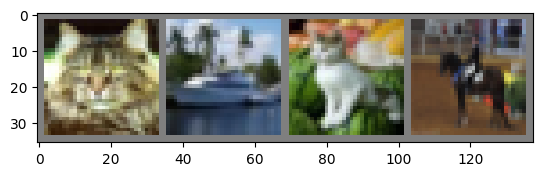

cat   ship  cat   horse


In [3]:
import matplotlib.pyplot as plt
import numpy as np


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 1.1 Defining CNN architectures

In [185]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    """
    Original neural network
    """
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class Net_1(nn.Module):
    """
    Doubling the number of channels in each layer
    """
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class Net_2(nn.Module):
    """
    Decrease to 1 convolutional layer
    """
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2, padding=1)
        self.fc1 = nn.Linear(1350, 120)
        self.fc2 = nn.Linear(120, 10)
        #self.fc3 = nn.Linear(30, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, self.num_flat_features(x))
        #x = torch.flatten(x,1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


class Net_3(nn.Module):
    """
    Increase to 3 convolutional layers
    """
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 5)
        self.pool = nn.MaxPool2d(2, 2, padding=1)
        self.fc1 = nn.Linear(128, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 24)
        self.fc4 = nn.Linear(24, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


class Net_4(nn.Module):
    """
    Activation Function: LeakyReLU
    """
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.LeakyReLU = nn.LeakyReLU(0.1)
    def forward(self, x):
        x = self.pool(self.LeakyReLU(self.conv1(x)))
        x = self.pool(self.LeakyReLU(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.LeakyReLU(self.fc1(x))
        x = self.LeakyReLU(self.fc2(x))
        x = self.fc3(x)
        return x


class Net_5(nn.Module):
    """
    Activation Function: Tanh
    """
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.Tanh = nn.Tanh()
    def forward(self, x):
        x = self.pool(self.Tanh(self.conv1(x)))
        x = self.pool(self.Tanh(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.Tanh(self.fc1(x))
        x = self.Tanh(self.fc2(x))
        x = self.fc3(x)
        return x

In [186]:
net   = Net()
net_1 = Net_1()
net_2 = Net_2()
net_3 = Net_3()
net_4 = Net_4()
net_5 = Net_5()

#### Train the network

In [250]:
def train_net(neural_net):
    
    # define a loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(neural_net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(2):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = neural_net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

    print('Finished Training')
    # saving the model
    # torch.save(neural_net.state_dict(), path)

In [188]:
train_net(net)
train_net(net_1)
train_net(net_2)
train_net(net_3)
train_net(net_4)
train_net(net_5)

[1,  2000] loss: 2.266
[1,  4000] loss: 1.891
[1,  6000] loss: 1.663
[1,  8000] loss: 1.574
[1, 10000] loss: 1.519
[1, 12000] loss: 1.484
[2,  2000] loss: 1.404
[2,  4000] loss: 1.387
[2,  6000] loss: 1.355
[2,  8000] loss: 1.340
[2, 10000] loss: 1.310
[2, 12000] loss: 1.293
Finished Training
[1,  2000] loss: 2.190
[1,  4000] loss: 1.825
[1,  6000] loss: 1.612
[1,  8000] loss: 1.528
[1, 10000] loss: 1.437
[1, 12000] loss: 1.386
[2,  2000] loss: 1.310
[2,  4000] loss: 1.291
[2,  6000] loss: 1.240
[2,  8000] loss: 1.194
[2, 10000] loss: 1.198
[2, 12000] loss: 1.193
Finished Training
[1,  2000] loss: 1.893
[1,  4000] loss: 1.621
[1,  6000] loss: 1.514
[1,  8000] loss: 1.488
[1, 10000] loss: 1.443
[1, 12000] loss: 1.423
[2,  2000] loss: 1.316
[2,  4000] loss: 1.311
[2,  6000] loss: 1.282
[2,  8000] loss: 1.280
[2, 10000] loss: 1.258
[2, 12000] loss: 1.274
Finished Training
[1,  2000] loss: 2.304
[1,  4000] loss: 2.303
[1,  6000] loss: 2.302
[1,  8000] loss: 2.239
[1, 10000] loss: 2.041
[1,

#### Test the network on the test data

In [171]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
#imshow(torchvision.utils.make_grid(images))
#print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [163]:
def get_total_accuracy(neural_net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = neural_net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [142]:
def get_group_accuracy(neural_net):
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = neural_net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1
    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

### Changing the number of channels

In [176]:
print("original CNN from tutorial")
print("-"*10)
get_total_accuracy(net)
print("")
print("doubling the number of channels")
print("-"*10)
get_total_accuracy(net_1)

original CNN from tutorial
----------
Accuracy of the network on the 10000 test images: 56 %
doubling the number of channels
----------
Accuracy of the network on the 10000 test images: 59 %


In [178]:
print("original CNN from tutorial")
print("-"*10)
get_group_accuracy(net)
print("")
print("doubling the number of channels")
print("-"*10)
get_group_accuracy(net_1)

original CNN from tutorial
----------
Accuracy for class: plane is 62.9 %
Accuracy for class: car   is 66.1 %
Accuracy for class: bird  is 51.6 %
Accuracy for class: cat   is 37.3 %
Accuracy for class: deer  is 34.2 %
Accuracy for class: dog   is 50.1 %
Accuracy for class: frog  is 59.5 %
Accuracy for class: horse is 69.4 %
Accuracy for class: ship  is 73.2 %
Accuracy for class: truck is 65.1 %
doubling the number of channels
----------
Accuracy for class: plane is 51.1 %
Accuracy for class: car   is 77.3 %
Accuracy for class: bird  is 54.0 %
Accuracy for class: cat   is 43.5 %
Accuracy for class: deer  is 62.0 %
Accuracy for class: dog   is 41.8 %
Accuracy for class: frog  is 75.9 %
Accuracy for class: horse is 55.5 %
Accuracy for class: ship  is 78.6 %
Accuracy for class: truck is 53.6 %


### Changing the number of convolutional layers

In [191]:
print("original CNN from tutorial")
print("-"*10)
get_total_accuracy(net)
print("")
print("decrease to 1 convolutional layer")
print("-"*10)
get_total_accuracy(net_2)
print("")
print("increase to 3 convolutional layer")
print("-"*10)
get_total_accuracy(net_3)

original CNN from tutorial
----------
Accuracy of the network on the 10000 test images: 56 %

decrease to 1 convolutional layer
----------
Accuracy of the network on the 10000 test images: 56 %

increase to 3 convolutional layer
----------
Accuracy of the network on the 10000 test images: 48 %


In [190]:
print("original CNN from tutorial")
print("-"*10)
get_group_accuracy(net)
print("")
print("decrease to 1 convolutional layer")
print("-"*10)
get_group_accuracy(net_2)
print("")
print("increase to 3 convolutional layer")
print("-"*10)
get_group_accuracy(net_3)

original CNN from tutorial
----------
Accuracy for class: plane is 57.4 %
Accuracy for class: car   is 71.8 %
Accuracy for class: bird  is 37.2 %
Accuracy for class: cat   is 16.0 %
Accuracy for class: deer  is 38.9 %
Accuracy for class: dog   is 53.4 %
Accuracy for class: frog  is 84.2 %
Accuracy for class: horse is 67.7 %
Accuracy for class: ship  is 71.8 %
Accuracy for class: truck is 62.7 %
decrease to 1 convolutional layer
----------
Accuracy for class: plane is 57.5 %
Accuracy for class: car   is 60.1 %
Accuracy for class: bird  is 37.2 %
Accuracy for class: cat   is 36.1 %
Accuracy for class: deer  is 47.2 %
Accuracy for class: dog   is 46.4 %
Accuracy for class: frog  is 60.1 %
Accuracy for class: horse is 73.3 %
Accuracy for class: ship  is 73.6 %
Accuracy for class: truck is 70.6 %
increase to 3 convolutional layer
----------
Accuracy for class: plane is 44.5 %
Accuracy for class: car   is 63.6 %
Accuracy for class: bird  is 37.0 %
Accuracy for class: cat   is 11.6 %
Accuracy

### Changing activation functions

In [192]:
print("original CNN from tutorial")
print("-"*10)
get_total_accuracy(net)
print("")
print("decrease to 1 convolutional layer")
print("-"*10)
get_total_accuracy(net_2)
print("")
print("increase to 3 convolutional layer")
print("-"*10)
get_total_accuracy(net_3)

original CNN from tutorial
----------
Accuracy of the network on the 10000 test images: 56 %

decrease to 1 convolutional layer
----------
Accuracy of the network on the 10000 test images: 56 %

increase to 3 convolutional layer
----------
Accuracy of the network on the 10000 test images: 48 %


In [193]:
print("original CNN from tutorial")
print("-"*10)
get_group_accuracy(net)
print("")
print("decrease to 1 convolutional layer")
print("-"*10)
get_group_accuracy(net_2)
print("")
print("increase to 3 convolutional layer")
print("-"*10)
get_group_accuracy(net_3)

original CNN from tutorial
----------
Accuracy for class: plane is 57.4 %
Accuracy for class: car   is 71.8 %
Accuracy for class: bird  is 37.2 %
Accuracy for class: cat   is 16.0 %
Accuracy for class: deer  is 38.9 %
Accuracy for class: dog   is 53.4 %
Accuracy for class: frog  is 84.2 %
Accuracy for class: horse is 67.7 %
Accuracy for class: ship  is 71.8 %
Accuracy for class: truck is 62.7 %

decrease to 1 convolutional layer
----------
Accuracy for class: plane is 57.5 %
Accuracy for class: car   is 60.1 %
Accuracy for class: bird  is 37.2 %
Accuracy for class: cat   is 36.1 %
Accuracy for class: deer  is 47.2 %
Accuracy for class: dog   is 46.4 %
Accuracy for class: frog  is 60.1 %
Accuracy for class: horse is 73.3 %
Accuracy for class: ship  is 73.6 %
Accuracy for class: truck is 70.6 %

increase to 3 convolutional layer
----------
Accuracy for class: plane is 44.5 %
Accuracy for class: car   is 63.6 %
Accuracy for class: bird  is 37.0 %
Accuracy for class: cat   is 11.6 %
Accura

## 1.2 Changing the training hyperparameters

### Changing learning rate

In [238]:
def train_net_parameters(neural_net, lr):
    
    # define a loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(neural_net.parameters(), lr=lr, momentum=0.9)

    for epoch in range(2):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = neural_net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

    print('Finished Training')
    # saving the model
    # torch.save(neural_net.state_dict(), path)

In [239]:
def get_total_train_accuracy(neural_net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = neural_net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [240]:
def get_group_train_accuracy(neural_net):
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = neural_net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1
    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [244]:
for i in [0.0001,0.001,0.01]:
    train_net_parameters(net, i)
    print(f"Learning Rate: {i}")
    print("-"*10)
    print("test accuracy")
    get_total_accuracy(net)
    get_group_accuracy(net)
    print("")
    print("train accuracy")
    get_total_train_accuracy(net)
    get_group_train_accuracy(net)
    print("")

Finished Training
Learning Rate: 0.0001
----------
test accuracy
Accuracy of the network on the 10000 test images: 46 %
Accuracy for class: plane is 51.2 %
Accuracy for class: car   is 59.0 %
Accuracy for class: bird  is 26.4 %
Accuracy for class: cat   is 34.5 %
Accuracy for class: deer  is 35.6 %
Accuracy for class: dog   is 38.0 %
Accuracy for class: frog  is 55.4 %
Accuracy for class: horse is 54.4 %
Accuracy for class: ship  is 58.2 %
Accuracy for class: truck is 51.8 %

train accuracy
Accuracy of the network on the 10000 test images: 51 %
Accuracy for class: plane is 55.1 %
Accuracy for class: car   is 69.0 %
Accuracy for class: bird  is 32.2 %
Accuracy for class: cat   is 39.2 %
Accuracy for class: deer  is 39.6 %
Accuracy for class: dog   is 42.5 %
Accuracy for class: frog  is 56.9 %
Accuracy for class: horse is 60.6 %
Accuracy for class: ship  is 64.6 %
Accuracy for class: truck is 59.6 %

Finished Training
Learning Rate: 0.001
----------
test accuracy
Accuracy of the network 

### Changing the optimizer

In [245]:
def train_net_parameters(neural_net, optimizer, lr=0.001):
    
    # define a loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    #optimizer = optim.SGD(neural_net.parameters(), lr=lr, momentum=0.9)

    for epoch in range(2):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = neural_net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

    print('Finished Training')
    # saving the model
    # torch.save(neural_net.state_dict(), path)

In [246]:
optimizer_SGD_no_momentum = optim.SGD(net.parameters(), momentum=0.0, lr=0.001)
optimizer_Adam = optim.Adam(net.parameters())

for i in [optimizer_SGD_no_momentum, optimizer_Adam]:
    train_net_parameters(net, optimizer = i)
    print("-"*10)
    print("test accuracy")
    get_total_accuracy(net)
    get_group_accuracy(net)
    print("")
    print("train accuracy")
    get_total_train_accuracy(net)
    get_group_train_accuracy(net)
    print("")

Finished Training
----------
test accuracy
Accuracy of the network on the 10000 test images: 46 %
Accuracy for class: plane is 50.7 %
Accuracy for class: car   is 60.3 %
Accuracy for class: bird  is 27.1 %
Accuracy for class: cat   is 32.7 %
Accuracy for class: deer  is 37.3 %
Accuracy for class: dog   is 39.6 %
Accuracy for class: frog  is 56.6 %
Accuracy for class: horse is 55.7 %
Accuracy for class: ship  is 57.8 %
Accuracy for class: truck is 51.8 %

train accuracy
Accuracy of the network on the 10000 test images: 53 %
Accuracy for class: plane is 55.3 %
Accuracy for class: car   is 71.8 %
Accuracy for class: bird  is 33.8 %
Accuracy for class: cat   is 39.8 %
Accuracy for class: deer  is 43.0 %
Accuracy for class: dog   is 45.0 %
Accuracy for class: frog  is 58.0 %
Accuracy for class: horse is 62.9 %
Accuracy for class: ship  is 67.6 %
Accuracy for class: truck is 62.4 %

Finished Training
----------
test accuracy
Accuracy of the network on the 10000 test images: 47 %
Accuracy for

### Larger batch size

In [251]:
batch_size = 32

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

train_net(net)
print("test accuracy")
get_total_accuracy(net)
get_group_accuracy(net)
print("")
print("train accuracy")
get_total_train_accuracy(net)
get_group_train_accuracy(net)
print("")

Finished Training
test accuracy
Accuracy of the network on the 10000 test images: 47 %
Accuracy for class: plane is 50.1 %
Accuracy for class: car   is 57.4 %
Accuracy for class: bird  is 34.2 %
Accuracy for class: cat   is 30.5 %
Accuracy for class: deer  is 35.7 %
Accuracy for class: dog   is 40.3 %
Accuracy for class: frog  is 53.8 %
Accuracy for class: horse is 57.0 %
Accuracy for class: ship  is 60.1 %
Accuracy for class: truck is 53.9 %

train accuracy
Accuracy of the network on the 10000 test images: 61 %
Accuracy for class: plane is 65.4 %
Accuracy for class: car   is 78.4 %
Accuracy for class: bird  is 45.2 %
Accuracy for class: cat   is 45.4 %
Accuracy for class: deer  is 45.6 %
Accuracy for class: dog   is 51.2 %
Accuracy for class: frog  is 60.2 %
Accuracy for class: horse is 70.4 %
Accuracy for class: ship  is 76.8 %
Accuracy for class: truck is 73.5 %



### Longer training time

In [248]:
def train_net_parameters(neural_net, num_epochs):
    
    # define a loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(neural_net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = neural_net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

    print('Finished Training')
    # saving the model
    # torch.save(neural_net.state_dict(), path)

In [249]:
train_net_parameters(net, num_epochs=5)
print("test accuracy")
get_total_accuracy(net)
get_group_accuracy(net)
print("")
print("train accuracy")
get_total_train_accuracy(net)
get_group_train_accuracy(net)
print("")

Finished Training
test accuracy
Accuracy of the network on the 10000 test images: 47 %
Accuracy for class: plane is 48.2 %
Accuracy for class: car   is 58.4 %
Accuracy for class: bird  is 36.0 %
Accuracy for class: cat   is 30.3 %
Accuracy for class: deer  is 34.0 %
Accuracy for class: dog   is 36.9 %
Accuracy for class: frog  is 57.7 %
Accuracy for class: horse is 57.9 %
Accuracy for class: ship  is 59.0 %
Accuracy for class: truck is 55.5 %

train accuracy
Accuracy of the network on the 10000 test images: 60 %
Accuracy for class: plane is 62.8 %
Accuracy for class: car   is 78.1 %
Accuracy for class: bird  is 45.6 %
Accuracy for class: cat   is 44.2 %
Accuracy for class: deer  is 44.0 %
Accuracy for class: dog   is 47.3 %
Accuracy for class: frog  is 63.6 %
Accuracy for class: horse is 70.8 %
Accuracy for class: ship  is 75.4 %
Accuracy for class: truck is 74.6 %



## 2. LSTM

Input dimension - represents the size of the input at each time step  
Hidden dimension - the number of nodes in the hidden layer at time t  
Number of layers - total number of LSTM layers in the neural network

In [ ]:
input_dim = 5
hidden_dim = 10
n_layers = 1

lstm_layer = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)

Initializing the LSTM

In [ ]:
batch_size = 1
seq_len = 1

inp = torch.randn(batch_size, seq_len, input_dim)
hidden_state = torch.randn(n_layers, batch_size, hidden_dim)
cell_state = torch.randn(n_layers, batch_size, hidden_dim)
hidden = (hidden_state, cell_state)

In [ ]:
out, hidden = lstm_layer(inp, hidden)
print("Output shape: ", out.shape)
print("Hidden: ", hidden)

The LSTM takes as input a sequence of variable length

In [ ]:
seq_len = 3
inp = torch.randn(batch_size, seq_len, input_dim)
out, hidden = lstm_layer(inp, hidden)
print(out.shape)

In [ ]:
# Obtaining the last output
out = out.squeeze()[-1, :]
print(out.shape)

### Amazon Review Example

In [ ]:
import bz2
from collections import Counter
import re
import nltk
import numpy as np
nltk.download('punkt')

train_file = bz2.BZ2File('../input/amazon_reviews/train.ft.txt.bz2')
test_file = bz2.BZ2File('../input/amazon_reviews/test.ft.txt.bz2')

train_file = train_file.readlines()
test_file = test_file.readlines()

First, we read the data and split train vs test sets

In [ ]:
num_train = 800000  # We're training on the first 800,000 reviews in the dataset
num_test = 200000  # Using 200,000 reviews from test set

train_file = [x.decode('utf-8') for x in train_file[:num_train]]
test_file = [x.decode('utf-8') for x in test_file[:num_test]]

Next, we extract the labels from train and test sets as well as do some data cleaning to format URLs

In [ ]:
# Extracting labels from sentences
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file]

test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file]

# Some simple cleaning of data
for i in range(len(train_sentences)):
    train_sentences[i] = re.sub('\d','0',train_sentences[i])

for i in range(len(test_sentences)):
    test_sentences[i] = re.sub('\d','0',test_sentences[i])

# Modify URLs to <url>
for i in range(len(train_sentences)):
    if 'www.' in train_sentences[i] or 'http:' in train_sentences[i] or 'https:' in train_sentences[i] or '.com' in train_sentences[i]:
        train_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_sentences[i])
        
for i in range(len(test_sentences)):
    if 'www.' in test_sentences[i] or 'http:' in test_sentences[i] or 'https:' in test_sentences[i] or '.com' in test_sentences[i]:
        test_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_sentences[i])

Then we tokenize each word using the nltk library and perform some additional tranformations that change all words to lowercase and remove words that only appear once. Making all words lowercase ensures that the same word is tokenized to the same value; otherwise, a capitalized word would be considered different than the same word in lowercase.

In [ ]:
words = Counter()  # Dictionary that will map a word to the number of times it appeared in all the training sentences
for i, sentence in enumerate(train_sentences):
    # The sentences will be stored as a list of words/tokens
    train_sentences[i] = []
    for word in nltk.word_tokenize(sentence):  # Tokenizing the words
        words.update([word.lower()])  # Converting all the words to lowercase
        train_sentences[i].append(word)
    if i%20000 == 0:
        print(str((i*100)/num_train) + "% done")
print("100% done")

In [ ]:
# Removing the words that only appear once
words = {k:v for k,v in words.items() if v>1}
# Sorting the words according to the number of appearances, with the most common word being first
words = sorted(words, key=words.get, reverse=True)
# Adding padding and unknown to our vocabulary so that they will be assigned an index
words = ['_PAD','_UNK'] + words
# Dictionaries to store the word to index mappings and vice versa
word2idx = {o:i for i,o in enumerate(words)}
idx2word = {i:o for i,o in enumerate(words)}

In [ ]:
for i, sentence in enumerate(train_sentences):
    # Looking up the mapping dictionary and assigning the index to the respective words
    train_sentences[i] = [word2idx[word] if word in word2idx else 0 for word in sentence]

for i, sentence in enumerate(test_sentences):
    # For test sentences, we have to tokenize the sentences as well
    test_sentences[i] = [word2idx[word.lower()] if word.lower() in word2idx else 0 for word in nltk.word_tokenize(sentence)]

We pad the sentences so they are all the same length. This ensures that training in batches is possible

In [ ]:
# Defining a function that either shortens sentences or pads sentences with 0 to a fixed length
def pad_input(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

seq_len = 200  # The length that the sentences will be padded/shortened to

train_sentences = pad_input(train_sentences, seq_len)
test_sentences = pad_input(test_sentences, seq_len)

# Converting our labels into numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

Split test set into validation and test. Validation will act as the final dataset on which to test the model after repeated training, testing, and hyperparameter tuning. 

In [ ]:
split_frac = 0.5 # 50% validation, 50% test
split_id = int(split_frac * len(test_sentences))
val_sentences, test_sentences = test_sentences[:split_id], test_sentences[split_id:]
val_labels, test_labels = test_labels[:split_id], test_labels[split_id:]

We convert the pre-processed data into tensors so we can work with them in PyTorch.

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

train_data = TensorDataset(torch.from_numpy(train_sentences), torch.from_numpy(train_labels))
val_data = TensorDataset(torch.from_numpy(val_sentences), torch.from_numpy(val_labels))
test_data = TensorDataset(torch.from_numpy(test_sentences), torch.from_numpy(test_labels))

batch_size = 400

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

If GPUs are available, cuda allows us to run parallel processes and train the PyTorch model must faster.

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

We define the neural network architecture with LSTM layers and a sigmoid function after the last LSTM layer that results in fully-connected classification layer that categorizes whether the sentiment is positive or negative.

In [ ]:
class SentimentNet(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(SentimentNet, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

We instantiate the SentimentNet class with 2 layers, each with embeddings dimension of 400 and 512 hidden nodes. We will use binary cross entropy loss as the loss function (because we are training a binary classifier) and Adam as the optimizer.

In [ ]:
vocab_size = len(word2idx) + 1
output_size = 1
embedding_dim = 400
hidden_dim = 512
n_layers = 2

model = SentimentNet(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model.to(device)

lr=0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

The model is then trained across 2 epochs

In [ ]:
epochs = 2
counter = 0
print_every = 1000
clip = 5
valid_loss_min = np.Inf

model.train()
for i in range(epochs):
    h = model.init_hidden(batch_size)
    
    for inputs, labels in train_loader:
        counter += 1
        h = tuple([e.data for e in h])
        inputs, labels = inputs.to(device), labels.to(device)
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        
        if counter%print_every == 0:
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inp, lab in val_loader:
                val_h = tuple([each.data for each in val_h])
                inp, lab = inp.to(device), lab.to(device)
                out, val_h = model(inp, val_h)
                val_loss = criterion(out.squeeze(), lab.float())
                val_losses.append(val_loss.item())
                
            model.train()
            print("Epoch: {}/{}...".format(i+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            if np.mean(val_losses) <= valid_loss_min:
                torch.save(model.state_dict(), './state_dict.pt')
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
                valid_loss_min = np.mean(val_losses)

Once the model is trained, we save it to state_dict.pth and can load it to make predictions.

In [ ]:
# Loading the best model
model.load_state_dict(torch.load('./state_dict.pt'))

test_losses = []
num_correct = 0
h = model.init_hidden(batch_size)

model.eval()
for inputs, labels in test_loader:
    h = tuple([each.data for each in h])
    inputs, labels = inputs.to(device), labels.to(device)
    output, h = model(inputs, h)
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    pred = torch.round(output.squeeze())  # Rounds the output to 0/1
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

print("Test loss: {:.3f}".format(np.mean(test_losses)))
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}%".format(test_acc*100))